In [3]:
%pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.9 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/8.9 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.9 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.9 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.9 MB 2.1 MB/s eta 0:00:03
   ----------------- ---------------------- 3.9/8.9 MB 2.4 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.9 MB 2.5 MB/s eta 0:00:02
   ------------------------ --------------- 5.5/8.9 MB 2.6 MB/s eta 0:00:02
   ---------------------------- -------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')

In [4]:
# Task 1: Simple Linear Regression
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')

X_single = X[['AveRooms']].values
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

In [5]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

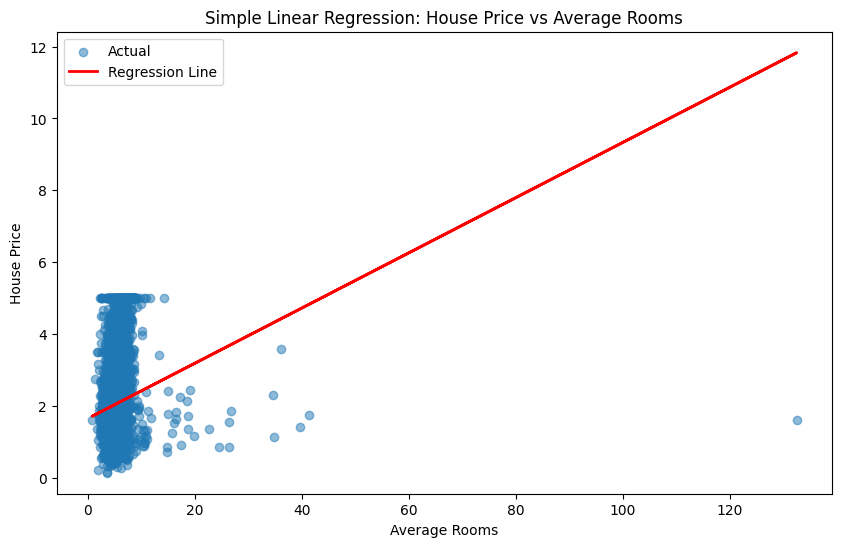

Simple Linear Regression R²: 0.0138


In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Rooms')
plt.ylabel('House Price')
plt.title('Simple Linear Regression: House Price vs Average Rooms')
plt.legend()
plt.show()
print(f"Simple Linear Regression R²: {r2_score(y_test, y_pred_simple):.4f}")

In [8]:
# Task 2: Multiple Linear Regression
X_multi = X[['MedInc', 'HouseAge', 'AveRooms', 'Population']].values
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [10]:
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)
y_pred_multi = model_multi.predict(X_test_multi)

r2 = r2_score(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)

In [11]:
print(f"\nMultiple Linear Regression Evaluation:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'Population']
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_multi.coef_
})
print(f"\nFeature Coefficients:")
print(coefficients)


Multiple Linear Regression Evaluation:
R-squared: 0.4980
MSE: 0.6578
RMSE: 0.8110

Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.444637
1    HouseAge     0.017481
2    AveRooms    -0.026764
3  Population     0.000023


In [12]:
# Task 3: Feature Scaling and Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

In [13]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

In [ ]:
print(f"\nComparison: Before vs After Scaling")
print(f"R² Before Scaling: {r2:.4f} | After Scaling: {r2_scaled:.4f}")
print(f"MSE Before Scaling: {mse:.4f} | After Scaling: {mse_scaled:.4f}")
print(f"RMSE Before Scaling: {rmse:.4f} | After Scaling: {rmse_scaled:.4f}")


Comparison: Before vs After Scaling
R² Before Scaling: 0.4980 | After Scaling: 0.4980
MSE Before Scaling: 0.6578 | After Scaling: 0.6578
RMSE Before Scaling: 0.8110 | After Scaling: 0.8110


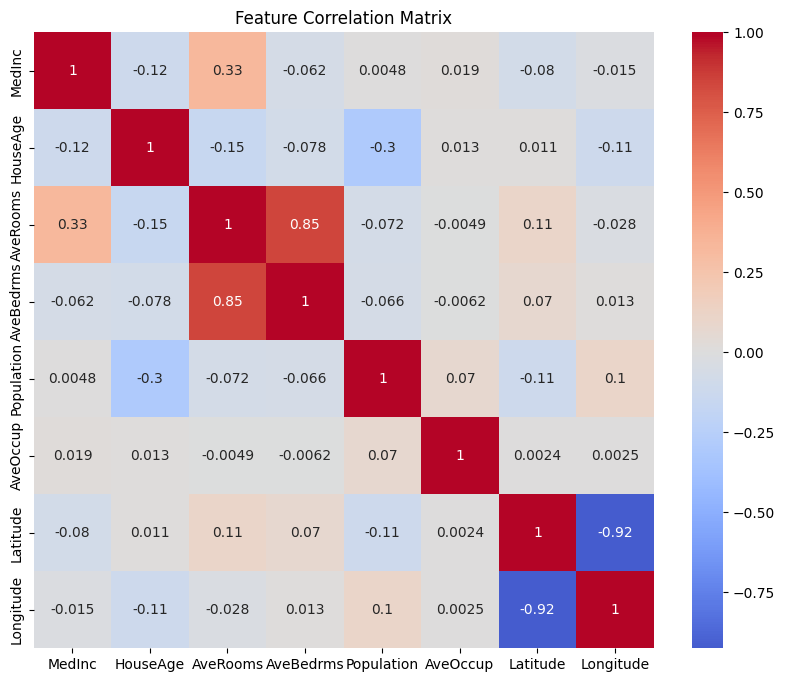

In [15]:
# Task 4: Model Interpretation
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


In [17]:
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = abs(correlation_matrix.iloc[i, j])
        if corr_value > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_value))

print(f"\nHigh correlation pairs (>0.7) indicating potential multicollinearity:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")




High correlation pairs (>0.7) indicating potential multicollinearity:
AveRooms - AveBedrms: 0.848
Latitude - Longitude: 0.925


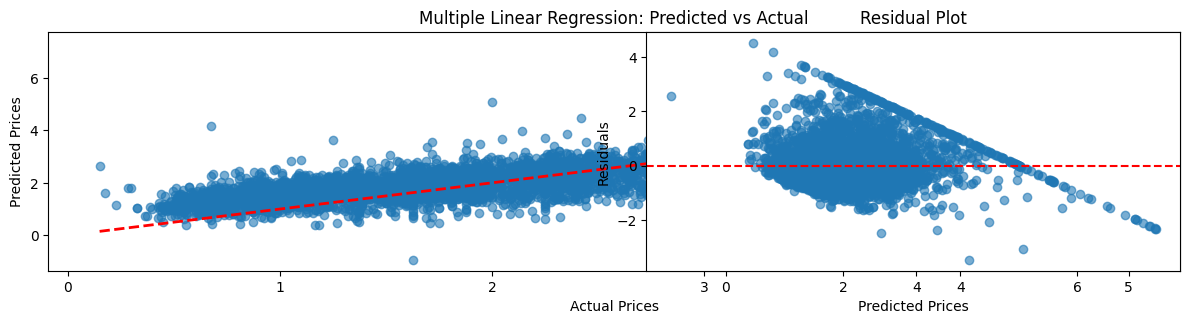

In [20]:
# Final model performance visualization
plt.figure(figsize=(12, 4))
plt.scatter(y_test, y_pred_multi, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression: Predicted vs Actual')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()